コスト出力のモデル作成

72size mapで追加特徴量

In [1]:
import time
import glob
import pickle
import numpy as np
import pandas as pd
from pandarallel import pandarallel
# from tqdm import tqdm

from ifloat.usecase.area_evaluator import SplittingGridEvaluator, WholeGridEvaluator, IAreaEvaluator
from ifloat.util.dependency import Dependency
from ifloat.infra.visualizer import visualize_floor, visualize_grid_and_sg
injector = Dependency()
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [2]:
with open("../data_set/layout_set/9layout/layout_set.pkl", "rb") as f:
    _, area, routes = pickle.load(f)


モデル作成

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from mlmodel.mk_model import make_deep_data


INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


テストデータのかさまし

In [4]:
# train_datagen=ImageDataGenerator(
#                                 #  width_shift_range=1/72,
#                                 #  height_shift_range=1/72,
#                                  horizontal_flip=True,
#                                  vertical_flip=True
#                                 )       

In [5]:
valid_datagen=ImageDataGenerator(
                                #  width_shift_range=1/72,
                                #  height_shift_range=1/72,
                                #  horizontal_flip=True,
                                #  vertical_flip=True
                                ) 

マップの読み込み

72×72×23

In [6]:
# with open("data_set/training/72bit_map_data.pkl", "rb") as f:
#     map_data = pickle.load(f)
    
# print(len(map_data))

72,72,1

In [7]:
# with open("data_set/training/72bit_cost_only_m.pkl", "rb") as f:
#     only_map_data = pickle.load(f)

# only_map_data=np.expand_dims(only_map_data,axis=-1)    

# print(len(only_map_data))

ラベルの読み込み

In [8]:
# # 保存したラベルを読み込む
# with open("data_set/training_label/lock_sg_2/72bit_cost_labels.pkl", "rb") as f:
#     labels = pickle.load(f)



In [9]:
with open("../data_set/training/randam/9map_2/filter_each_conbine_astar_map.pkl", "rb") as f:
    only_map_data = pickle.load(f)



print(len(only_map_data))
with open("../data_set/training_label/randam/9map_2/astar/astar_cost_diff.pkl", "rb") as f:
    labels = pickle.load(f)

25430


In [10]:
print((labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 11, 11, 11, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [11]:
# X_train = np.array(map_data)
X_train = np.array(only_map_data)



Y_train = np.array(labels)
Y_train=np.expand_dims(Y_train,axis=-1)

print(X_train.shape,Y_train.shape)

(25430, 18, 18, 3) (25430, 1)


In [12]:
print(Y_train[0])

[0]


In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
y_train_normalized = scaler.fit_transform(Y_train.reshape(-1, 1))

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.1)

In [15]:
print(x_train.shape,x_valid.shape)

(22887, 18, 18, 3) (2543, 18, 18, 3)


検証データのロード

In [16]:
# with open("data_set/valid/72bit_map_data.pkl", "rb") as f:
#     valid_in_deep_data= pickle.load(f)

In [17]:
# with open("data_set/valid/72bit_cost_only_m.pkl", "rb") as f:
#     valid_only_m= pickle.load(f)
    
# valid_only_m=np.expand_dims(valid_only_m,axis=-1)

In [18]:
# # X_valid=np.array(valid_in_deep_data)
# X_valid=np.array(valid_only_m)

# print(len(X_valid))

検証データのラベル

In [19]:
# with open("data_set/valid_label/lock_sg_2/72bit_cost_labels.pkl", "rb") as f:
#     valid_labels= pickle.load(f)

In [20]:

# valid_labels=np.array(valid_labels)
# valid_labels=np.expand_dims(valid_labels,axis=-1)
# print(valid_labels[0])

データセット

In [21]:
# train_generator= train_datagen.flow(
#     X_train,
#     Y_train,
#     batch_size=batch_size
# )

In [22]:
# valid_generator= valid_datagen.flow(
#     X_valid,
#     valid_labels,
#     batch_size=batch_size
# )

In [23]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,Dropout,BatchNormalization

In [24]:
# # 実際の入力データの形状を確認
# print("X_train shape:", X_train.shape)

# # 入力形状を実際のデータに合わせて定義
# input_map = Input(shape=(18, 18, 3))


# # モデルの構築
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_map)
# # x = BatchNormalization()(x)

# x = MaxPooling2D((2, 2), padding='same')(x)
# # x = Dropout(0.15)(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)

# x = MaxPooling2D((2, 2), padding='same')(x)
# # x = Dropout(0.15)(x)
# x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)

# x = MaxPooling2D((2, 2), padding='same')(x)
# # x = Dropout(0.15)(x)
# # x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# # # # x = BatchNormalization()(x)
# # # # x = Dropout(0.15)(x)
# # x = MaxPooling2D((2, 2), padding='same')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# # # x = BatchNormalization()(x)
# # # x = Dropout(0.15)(x)
# # x = MaxPooling2D((2, 2), padding='same')(x)


# x = layers.Flatten()(x)
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dense(512, activation='relu')(x)
# outputs = layers.Dense(1,activation="linear")(x)  # 回帰出力

# model = models.Model(inputs=input_map, outputs=outputs)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])







In [25]:
input_map = Input(shape=(18, 18, 3))


# モデルの構築
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_map)
# x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = MaxPooling2D((2, 2), padding='same')(x)
# x = Dropout(0.15)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# x = Dropout(0.15)(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)

x = MaxPooling2D((2, 2), padding='same')(x)
# x = Dropout(0.15)(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# # # x = BatchNormalization()(x)
# # # x = Dropout(0.15)(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)
# # x = Dropout(0.15)(x)
# x = MaxPooling2D((2, 2), padding='same')(x)


x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
outputs = layers.Dense(1,activation="linear")(x)  # 回帰出力

model = models.Model(inputs=input_map, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [26]:
# # 中間層出力モデルの作成
# layer_names = ['input_layer', 'conv2d', 'dropout', 'max_pooling2d', 'conv2d_1', 'dropout_1', 'max_pooling2d_1', 'conv2d_2', 'dropout_2', 'max_pooling2d_2', 'flatten', 'dense', 'dense_1']
# intermediate_outputs = [model.get_layer(name).output for name in layer_names]
# activation_model = models.Model(inputs=model.input, outputs=intermediate_outputs)

In [27]:
def get_intermediate_outputs(data):
    # データの形状を確認
    print("Input data shape:", data.shape)
    
    
    
    # 中間層の出力を取得
    activations = activation_model.predict(data)
    
    # 各層の出力を表示
    for name, activation in zip(layer_names, activations):
        print(f"\nLayer {name}:")
        print(f"Output shape: {activation.shape}")
        print(f"Output stats: min={np.min(activation):.3f}, max={np.max(activation):.3f}, "
              f"mean={np.mean(activation):.3f}, std={np.std(activation):.3f}")
    
    return activations

In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18, 18, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 18, 18, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,360,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,556,353 (17.38 MB)

 Trainable params: 4,556,353 (17.38 MB)

 Non-trainable params: 0 (0.00 B)

モデルの作成とコンパイル

In [29]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [30]:
batch_size=32

In [31]:


history = model.fit(x_train,y_train, epochs=30, batch_size=batch_size,
                    validation_data=(x_valid,y_valid),
                    )

Epoch 1/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - loss: 2.6539 - mae: 0.7438 - val_loss: 2.8879 - val_mae: 0.8801
Epoch 2/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - loss: 2.6025 - mae: 0.7258 - val_loss: 2.8861 - val_mae: 0.5532
Epoch 3/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - loss: 2.6399 - mae: 0.7062 - val_loss: 2.7623 - val_mae: 0.6207
Epoch 4/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - loss: 2.4781 - mae: 0.6919 - val_loss: 2.5807 - val_mae: 0.5969
Epoch 5/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - loss: 2.0943 - mae: 0.6555 - val_loss: 2.3738 - val_mae: 0.5431
Epoch 6/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - loss: 1.9900 - mae: 0.6252 - val_loss: 2.2666 - val_mae: 0.5628
Epoch 7/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - loss: 1.7149 - mae: 0.5798 - val_loss: 1.8817 - val_mae: 0.5799
Epoch 8/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - loss: 1.5649 - mae: 0.5584 - val_loss: 2.0069 - val_mae: 0.5301
Epoch 9/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 

損失関数のプロット

<function matplotlib.pyplot.show(close=None, block=None)>

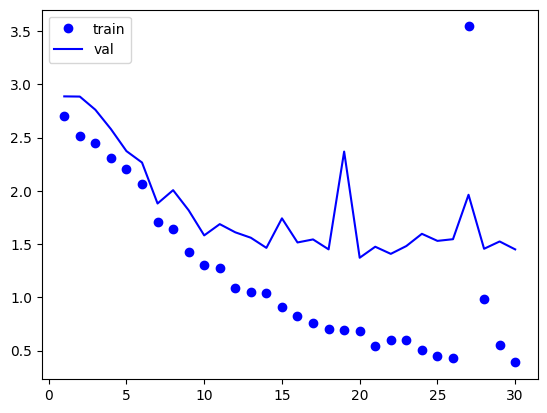

In [32]:
history_di= history.history
loss= history_di["loss"]
val= history_di["val_loss"]

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,"bo",label="train")
plt.plot(epochs,val,"b",label="val")
# plt.xlim(1,100)
# plt.ylim(50,20000)
plt.legend()
plt.show

テストデータのロード

In [33]:
# with open("data_set/test/72bit_map_data.pkl", "rb") as f:
#     test_in_deep_data= pickle.load(f)

In [34]:
# with open("data_set/test/72bit_cost_only_m.pkl", "rb") as f:
#     test_only_m= pickle.load(f)
    
# test_only_m=np.expand_dims(test_only_m,axis=-1)

In [35]:
# with open("data_set/test/72chanel/72bit_notinf_map_sg_2.pkl", "rb") as f:
#     test_only_m= pickle.load(f)

In [36]:
with open("../data_set/test/randam/9map_2/filter_each_conbine_astar_map.pkl", "rb") as f:
    test_only_m = pickle.load(f)



print(len(test_only_m))
with open("../data_set/test_label/randam/9map_2/astar/astar_cost_diff.pkl", "rb") as f:
    test_labels = pickle.load(f)

1922


In [37]:
# T=np.array(test_in_deep_data)
T=np.array(test_only_m)

print(T.shape)

(1922, 18, 18, 3)


In [38]:
# with open("data_set/test_label/lock_sg_2/72bit_cost_labels.pkl", "rb") as f:
#     test_labels= pickle.load(f)

In [39]:

# with open("data_set/test_label/lock_sg_2/astar/72bit_astar_cost_diff.pkl", "rb") as f:
#     test_labels= pickle.load(f)

In [40]:
test_labels=np.array(test_labels)
test_labels=test_labels.reshape((len(test_labels),1))
# print(test_labels)
print((test_labels))

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


予測

In [41]:
start_time = time.time()  # 予測開始時刻を記録
# pre_cost = model.predict(T)
y_pred_normalized = model.predict(T)

end_time = time.time()  # 予測終了時刻を記録
pre_cost = scaler.inverse_transform(y_pred_normalized)
elapsed_time = end_time - start_time

print(pre_cost.shape)
print(elapsed_time)



61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
(1922, 1)
0.7466228008270264


In [42]:
max_cost=max(pre_cost)
max_index=np.where(pre_cost==max_cost)

min_cost=min(pre_cost)
min_index=np.where(pre_cost==min_cost)

print(f"予測時間: {elapsed_time:.4f}秒")
# print(pre_cost)
print(max_cost,max_index)
print(min_cost,min_index)

print(pre_cost)

予測時間: 0.7466秒
[408.5732] (array([499], dtype=int64), array([0], dtype=int64))
[-6.9021826] (array([810], dtype=int64), array([0], dtype=int64))
[[ 0.8289485]
 [ 3.0806916]
 [ 4.2575817]
 ...
 [ 6.71946  ]
 [-3.0476239]
 [-0.7962134]]


In [43]:
from mlmodel.mk_model import separate_m_start_goal

比較する

In [44]:
pre_cost=np.round(pre_cost)

In [45]:
a= abs(pre_cost-test_labels)
# print(a)

In [46]:
a= abs(pre_cost-test_labels)
max_dev=max(a)
print(max_dev)

mean = sum(a)/len(a)
print(mean)

[409.]
[10.46462019]


In [47]:
with open(f"../data_set/test_label/randam/9map_2/astar/notinf_cost_labels.pkl","rb") as f:
    astar_cost=pickle.load(f)
    
astar_cost=np.array(astar_cost)
astar_cost=astar_cost.reshape((len(astar_cost),1))
z=np.array(astar_cost)
print(z.shape)
z=z.reshape((len(z),))

a= abs(test_labels)
max_dev=max(a)
print(max_dev)

mean = sum(a)/len(a)
print(mean)


(1922, 1)
[20]
[0.42091571]


In [48]:
# before_model = tf.keras.models.load_model("../data_set/model/more_inf_9map_doff.keras")
# before_model.summary()

In [49]:
# with open("../data_set/test/72chanel/72bit_notinf_map_sg_2.pkl", "rb") as f:
#     test_only_m= pickle.load(f)

# T_1=np.array(test_only_m)

# print(T_1.shape)

In [50]:
# start_time = time.time()  # 予測開始時刻を記録
# before_cost = before_model.predict(T)
# end_time = time.time()  # 予測終了時刻を記録

# elapsed_time = end_time - start_time

# print(before_cost.shape)
# print(elapsed_time)

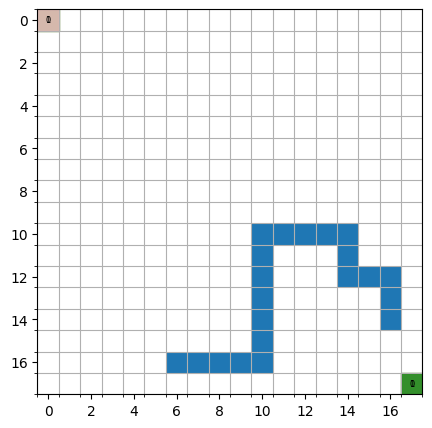

In [51]:
m=T[5]
starts=[[0,0],[17,17]]
goals=[[17,17],[0,0]]
m2=m[:,:,1]

visualize_grid_and_sg(m2, starts, goals, size_inch=5.0)

C:\Users\mochizuki\AppData\Local\Temp\ipykernel_2948\554419646.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


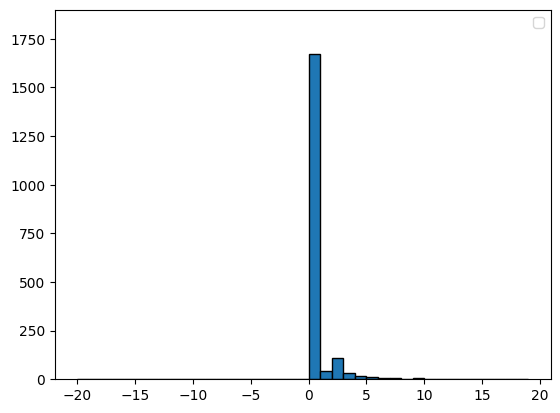

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pre_cost=np.round(pre_cost)
y=pre_cost.reshape((len(pre_cost),))  # Adjust the length of x to match y
x = test_labels.reshape((len(test_labels),))

d=np.array(pre_cost)
d=d.reshape((len(d),))

w=x+z #real cost
#precost
A=(w-z-y)#realcost-precost
# B=(x-be)
# plt.scatter(x,A)
# plt.scatter(w,A)
# plt.scatter(w,x)
# plt.scatter(w, y+z,label="proposed method")
# plt.scatter(w,z,color="orange",label="astar cost")
# plt.xlabel('real cost - A*cost')  # 必要に応じてラベルを追加
# plt.ylabel('real cost - predict cost')
bins=np.arange(-20, 20, 1)
# plt.hist(x, bins=bins, edgecolor='black')
plt.hist(A, bins=bins,edgecolor='black')

plt.ylim(0,1900)
# fig, ax = plt.subplots()

# step4 箱ひげ図の描画
# 一般的な箱ひげ図
# ax.boxplot([x,A])


# y=xの直線を追加
# plt.plot(w, w, color='red', label='y=x')

# plt.plot(x, x, color='red', label='y=x')

# plt.plot(x, x+10, color='red', label='y=x')
# plt.plot(x, x-10, color='red', label='y=x')


plt.legend()
plt.show()

# plt.hist(B, bins=bins, edgecolor='black')
# plt.ylim(0,400)
# plt.show()

In [ ]:
# model.save("data_set/model/lock_sg_2_mse.keras")

model.save("../data_set/model/batch_randam_each_9map_diff_a.keras")

In [ ]:
# 使用例
# X_trainの最初の1枚だけを使用してテスト
sample_data = T[0:1]  # バッチサイズ1で取得
activations = get_intermediate_outputs(sample_data)

# 可視化関数
def visualize_layer_outputs(activations, layer_names):
    
    for activation, name in zip(activations, layer_names):
        if len(activation.shape) == 4:  # 畳み込み層の出力
            n_features = min(20, activation.shape[-1])
            print(n_features)
            plt.figure(figsize=(12, 8))
            for i in range(n_features):
                plt.subplot(5, 4, i + 1)
                plt.imshow(activation[0, :, :, i], cmap='viridis')
                plt.axis('off')
            plt.suptitle(f'Feature maps of {name} layer')
            plt.show()
        elif len(activation.shape) == 2:  # 全結合層の出力
            plt.figure(figsize=(8, 4))
            plt.hist(activation[0], bins=50)#histgram
            plt.title(f'Activation distribution of {name} layer')
            plt.xlabel('Activation value')
            plt.ylabel('Frequency')
            plt.show()

# 可視化の実行
visualize_layer_outputs(activations, layer_names)

In [ ]:
counter=0
co=0
c=0
zero=0
A=abs(w-z-y)#realcost-precost
for i in range(len(d)):
    

    if A[i]<x[i]:
        counter=counter+1
    elif x[i]<A[i]:
        co=co+1
    
    elif x[i]==A[i]:
        if x[i]==0:
            zero=zero+1
        c=c+1
    
print(f"good,bad,equal")
print(counter,co,c,zero)



good,bad,equal
147 77 1698 1601


In [ ]:
count=0

for i in range(len(y)):
    if x[i]==y[i]:
        count=count+1

accuracy=count/len(y)

print(accuracy)

0.8059313215400624


In [ ]:

sum_A=sum(A)

sum_t=sum(x)

print(sum_A/549,sum_t/549)

In [ ]:
counter=0
for pred,real in zip(pre_cost,test_labels):
    threshold=1
    
    diff=abs(pred-real)
    
    if diff < threshold:
        counter=counter+1
    else :
        print(diff)
        
print(counter)
true_rate=counter/549
print(true_rate)

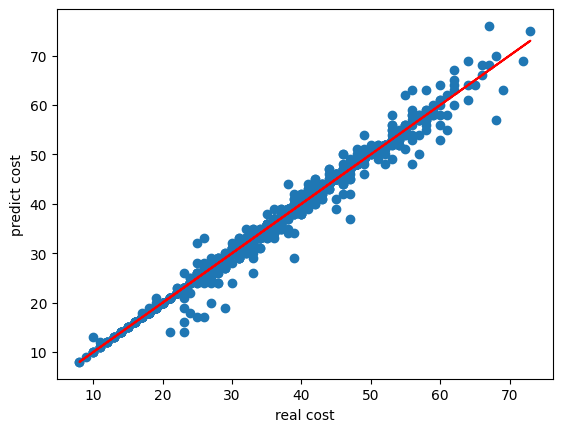

In [ ]:

# y=pre_cost.reshape((549,))  # Adjust the length of x to match y
# x = test_labels.reshape((549,))

plt.scatter(x+z, y+z)
# plt.scatter(x+z,z)
plt.xlabel('real cost')  # 必要に応じてラベルを追加
plt.ylabel('predict cost')

# y=xの直線を追加
plt.plot(x+z, x+z, color='red', label='y=x')

# plt.plot(x, x+10, color='red', label='y=x')
# plt.plot(x, x-10, color='red', label='y=x')



plt.show()